In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import LSTM, Dense

from sklearn.preprocessing import MinMaxScaler


In [10]:
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url, usecols=[1], header=0)
data

,Passengers
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390


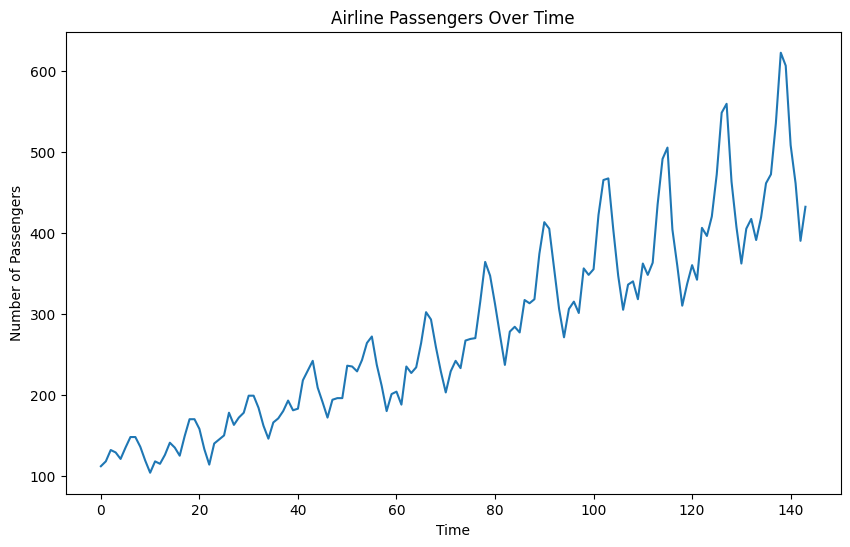

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(data)
plt.title("Airline Passengers Over Time")
plt.xlabel("Time")
plt.ylabel("Number of Passengers")
plt.show()

In [11]:
# Normalize data (values between 0 and 1)
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Create sequences for LSTM
def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps, 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

# Parameters
time_steps = 10

# Create input-output sequences
X, y = create_sequences(data_scaled, time_steps)

# Reshape X to be [samples, time_steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

In [3]:
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [4]:
model = Sequential([
    LSTM(50, activation='relu', input_shape=(time_steps, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


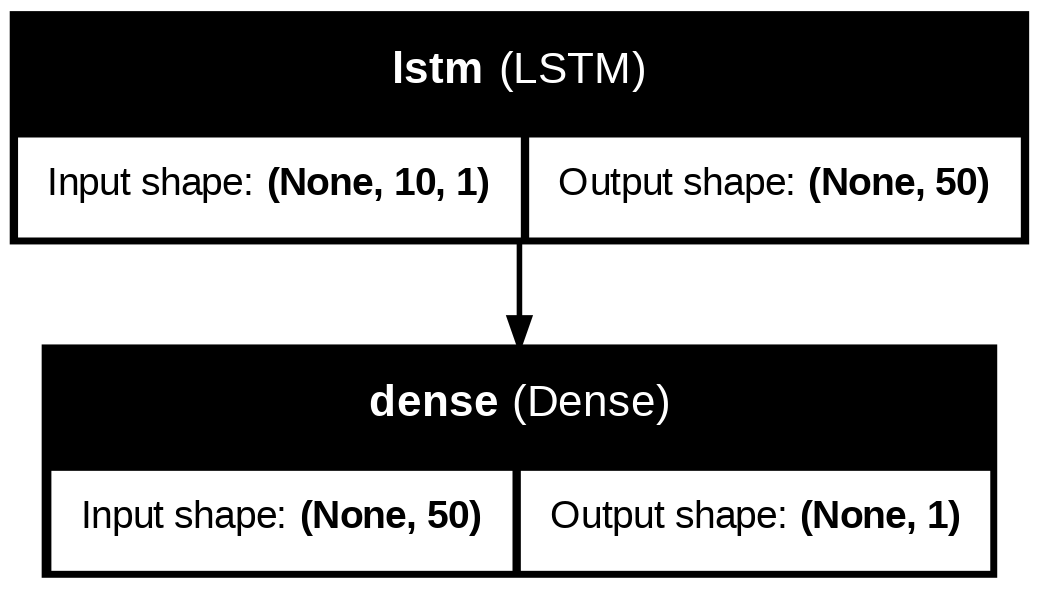

In [9]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [5]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - loss: 0.1241 - val_loss: 0.4065
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0934 - val_loss: 0.3369
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0838 - val_loss: 0.2728
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0627 - val_loss: 0.2136
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0429 - val_loss: 0.1570
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0326 - val_loss: 0.1027
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0198 - val_loss: 0.0576
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0131 - val_loss: 0.0312
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0136 - val_loss: 0.0246
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0150 - val_loss: 0.0254
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0119 - val_loss: 0.0302
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0101 - val_loss: 0.0353
E

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0269
Test Loss: 0.02687404863536358
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


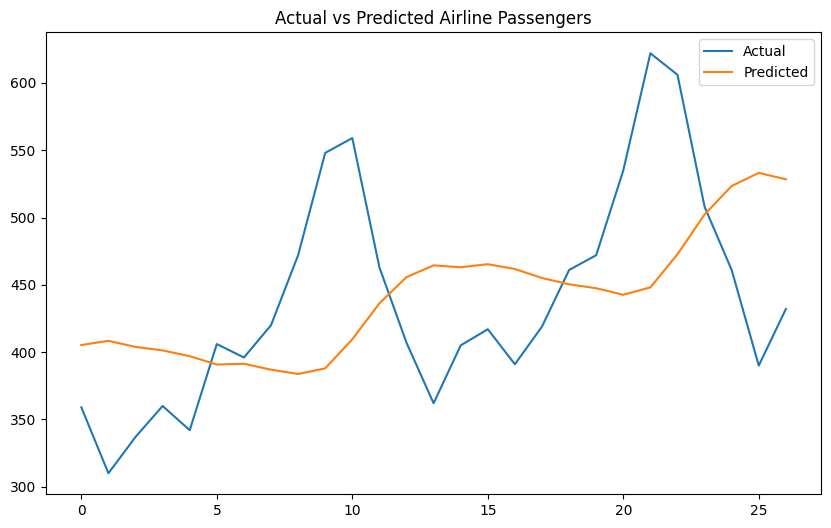

In [6]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Make predictions
y_pred = model.predict(X_test)

# Invert scaling to get actual values
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_actual = scaler.inverse_transform(y_pred)

# Plot predictions vs actual
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, label='Actual')
plt.plot(y_pred_actual, label='Predicted')
plt.legend()
plt.title("Actual vs Predicted Airline Passengers")
plt.show()